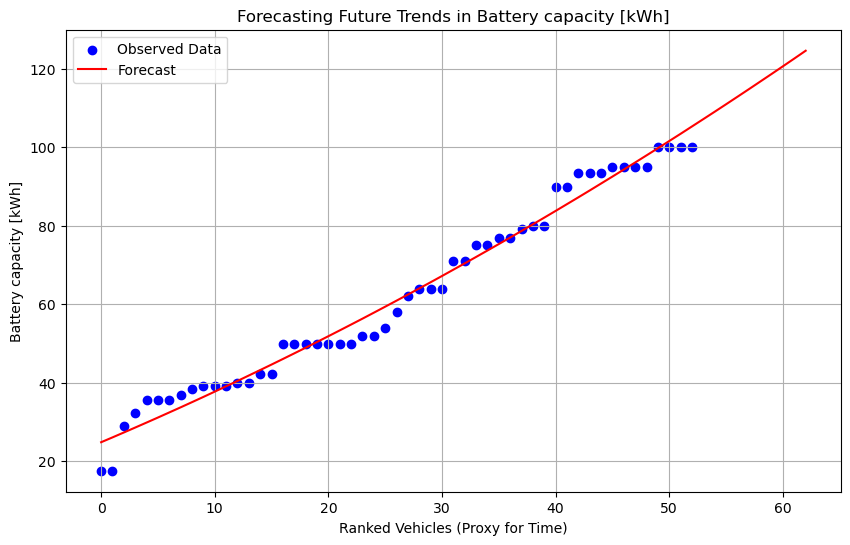

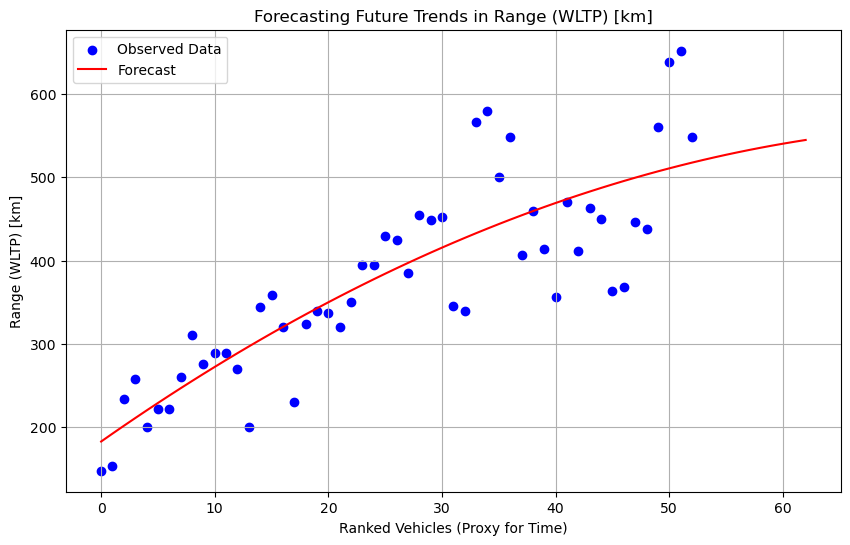

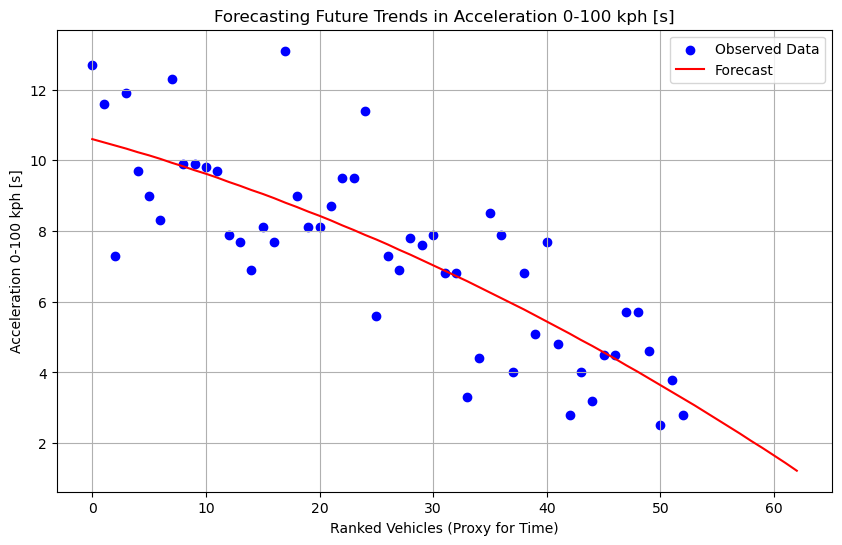

Future Battery Capacities (kWh): [107.18 109.06 110.96 112.87 114.79 116.73 118.67 120.63 122.6  124.59]
Future Ranges (WLTP) [km]: [520.99 524.13 527.15 530.04 532.82 535.48 538.02 540.43 542.73 544.91]
Future Accelerations 0-100 kph [s]: [3.07 2.87 2.67 2.47 2.27 2.06 1.86 1.65 1.44 1.22]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
ae = pd.read_csv("cleaned_FEV-data-Excel.xlsx - Auta elektryczne.csv")
import numpy as np
import matplotlib.pyplot as plt

# Sort data by Battery capacity
ae_sorted = ae.sort_values(by='Battery capacity [kWh]').reset_index(drop=True)

# Prepare data
X = np.arange(len(ae_sorted))  # Ranked index as proxy for time

# Function for polynomial regression and forecasting
def forecast_trend_numpy(feature, degree=2, future_steps=10):
    y = ae_sorted[feature].values  # Extract feature values

    # Fit a polynomial regression model
    coeffs = np.polyfit(X, y, degree)  # Fit polynomial of specified degree
    poly = np.poly1d(coeffs)  # Generate polynomial function

    # Generate predictions for current and future values
    future_X = np.arange(len(X) + future_steps)  # Future indices
    future_y = poly(future_X)  # Predictions

    # Round predictions to 2 decimal places for clarity
    future_y = np.round(future_y, 2)

    # Plot observed and predicted trends
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Observed Data')
    plt.plot(future_X, future_y, color='red', label='Forecast')
    plt.xlabel("Ranked Vehicles (Proxy for Time)")
    plt.ylabel(feature)
    plt.title(f"Forecasting Future Trends in {feature}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return future_y[-future_steps:]  # Return future predictions

# Forecast trends for selected features
future_battery = forecast_trend_numpy('Battery capacity [kWh]')
future_range = forecast_trend_numpy('Range (WLTP) [km]')
future_acceleration = forecast_trend_numpy('Acceleration 0-100 kph [s]')

# Display future predictions
print("Future Battery Capacities (kWh):", future_battery)
print("Future Ranges (WLTP) [km]:", future_range)
print("Future Accelerations 0-100 kph [s]:", future_acceleration)


In [ ]:
'''
As per the plot, the battery capacity are expected to grow in the future, the plot of future trend in Range of vehicle tends to go upwards, 
suggesting better battery efficiency and energy management to increase the range of vehicles and a decreasing trend in Acceleration plot indicates 
downfall in performance and slower acceleration time in upcoming EVs.
'''